#### imports

In [2]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt

from src.scripts import filters

#### path definitions

In [3]:
path_df_channels_en = 'data/df_channels_en.tsv'
# TODO: not used yet path_df_channels_filtered = 'data/filtered_df_channels_en.csv'

path_df_timeseries = 'data/df_timeseries_en.tsv'

path_yt_metadata_feather = 'data/yt_metadata_helper.feather'
path_yt_metadata_feather_filtered = 'data/filtered_yt_metadata_helper.feather.csv'

path_yt_metadata = 'data/yt_metadata_en.jsonl'
path_yt_metadata_filtered = 'data/filtered_yt_metadata.csv'

path_final_channels = 'data/final_channels.csv'
path_final_timeseries = 'data/final_timeseries.csv'
path_final_yt_metadata_feather = 'data/final_yt_metadata_helper.csv'
path_final_yt_metadata = 'data/final_yt_metadata.csv'

### strcuture of different datasets

#### df_channels_en.tsv

CSV file, having the following structure:
| **category_cc** | **join_date** | **channel**              | **name_cc**             | **subscribers_cc** | **videos_cc** | **subsriber_rank_sb** | **weights** |
|-----------------|---------------|--------------------------|-------------------------|--------------------|---------------|-----------------------|-------------|
| News & Politics | 2013-03-11    | UCcRgZlgsk5m-aDQa_d6BTkQ | NorthWestLibertyNews... | 16700              | 845           | 639043.0              | 10.0035     |
| Gaming          |    2012-01-15 | UCnnXR0VIJVpeL1wEr-bBaRw | Felix Guaman            | 112000             | 703           | 137318.0              | 5.4915      |

With:
- `category_cc`: most frequent category of the channel. One of: ['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports', 'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism', 'People & Blogs', 'News & Politics', 'Science & Technology', 'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan]
- `join_date`: join date of the channel.
- `channel`: unique channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal



#### yt_metadata_helper.feather   (yt_metadata_helper.feather.csv, filtered_yt_metadata_helper.feather.csv)
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>categories</th>
      <th>channel_id</th>
      <th>dislike_count</th>
      <th>display_id</th>
      <th>duration</th>
      <th>like_count</th>
      <th>upload_date</th>
      <th>view_count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Film &amp; Animation</td>
      <td>UCy6sWF4taso5GtrfDGhwpBA</td>
      <td>0.0</td>
      <td>EXOviJ_EJDo</td>
      <td>68</td>
      <td>0.0</td>
      <td>2011-12-07</td>
      <td>76.0</td>
    </tr>
    <tr>
      <td>Gaming</td>
      <td>UCEPYwwuGhgA9wfO2It11OXw</td>
      <td>0.0</td>
      <td>xSKA6VX7Tdo</td>
      <td>125</td>
      <td>6.0</td>
      <td>2016-10-04</td>
      <td>198.0</td>
    </tr>
    <tr>
      <td>News &amp; Politics</td>
      <td>UCojNA7ZvnmGuIvYnm44wl3Q</td>
      <td>NaN</td>
      <td>FsucWMijKA4</td>
      <td>130</td>
      <td>NaN</td>
      <td>2010-11-18</td>
      <td>106.0</td>
    </tr>
  </tbody>
</table>
</div>

With (values were crawled from YouTube between 2019-10-29 and 2019-11-23):
- `categories`: category (self-defined when they upload a video to YouTube)
- `channel_id`: unique channel id
- `dislike_count`: dislikes of the video
- `display_id`: unique video id
- `duration`: duration of the video
- `like_count`:likes of the video.
- `upload_date`: upload date
- `view_count`: views of the video.


#### yt_metadata.jsonl
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>categories</th>
      <th>channel_id</th>
      <th>crawl_date</th>
      <th>description</th>
      <th>dislike_count</th>
      <th>display_id</th>
      <th>duration</th>
      <th>like_count</th>
      <th>tags</th>
      <th>title</th>
      <th>upload_date</th>
      <th>view_count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Film &amp; Animation</td>
      <td>UCy6sWF4taso5GtrfDGhwpBA</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>0.0</td>
      <td>EXOviJ_EJDo</td>
      <td>68</td>
      <td>0.0</td>
      <td>tags</td>
      <td>title</td>
      <td>2011-12-07</td>
      <td>76.0</td>
    </tr>
    <tr>
      <td>Gaming</td>
      <td>UCEPYwwuGhgA9wfO2It11OXw</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>0.0</td>
      <td>xSKA6VX7Tdo</td>
      <td>125</td>
      <td>6.0</td>
      <td>tags</td>
      <td>title</td>
      <td>2016-10-04</td>
      <td>198.0</td>
    </tr>
    <tr>
      <td>News &amp; Politics</td>
      <td>UCojNA7ZvnmGuIvYnm44wl3Q</td>
      <td>2019-10-29</td>
      <td>description</td>
      <td>NaN</td>
      <td>FsucWMijKA4</td>
      <td>130</td>
      <td>NaN</td>
      <td>tags</td>
      <td>title</td>
      <td>2010-11-18</td>
      <td>106.0</td>
    </tr>
  </tbody>
</table>
</div>

With (values were crawled from YouTube between 2019-10-29 and 2019-11-23):
- `categories`: category (self-defined when they upload a video to YouTube)
- `channel_id`: unique channel id
- `dislike_count`: dislikes of the video
- `display_id`: unique video id
- `duration`: duration of the video
- `like_count`:likes of the video.
- `upload_date`: upload date
- `view_count`: views of the video.

#### df_timeseries_en.tsv

| **channel**              | **category**       | **datetime** | **views**   | **delta_views** | **subs** | **delta_subs** | **videos** | **delta_videos** | **activity** |
|--------------------------|--------------------|--------------|-------------|-----------------|----------|----------------|------------|------------------|--------------|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |

With:
- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.


#### youtube_comments.tsv

| **author** | **video_id**      |  **likes** |  **replies** |
|------|--------------|-------|---------|
| 1      | Gkb1QMHrGvA   |  2     |  0       |
| 1      | CNtp0xqoods   |  0     |  0       |
| 1      | 249EEzQmVmQ   |  1     |  0       |

With (data obtained at crawl time between 2019-09-12 and 2019-09-17):
- `author`: anonymized author id (unique)
- `video_id`: unique video id of the video the comment was written
- `likes`: likes for the comment
- `replies`: replies for the comment

## Filter channels by category "News & Politics" and activity

In [4]:
pl_df_f = pl.read_csv(path_df_channels_en, separator="\t")

filtered_df_ch = filters.filter_df(pl_df_f, column_name="category_cc", 
                                   value="News & Politics", cmpstr="==")

print(f"Number of channels in category 'News & Politics': {len(filtered_df_ch)}")

Number of channels in category 'News & Politics': 2263


### Load timeseries dataframe

In [5]:
df_timeseries = pl.read_csv(path_df_timeseries, separator="\t")

filtered_df_timeseries = filters.filter_df_isin(df_timeseries, column_name="channel", 
                                                values=filtered_df_ch["channel"]) #.write_csv("../Youniverse/filtered_df_timeseries_en.tsv", include_header=True, separator="\t")

In [6]:
grouped_df = filtered_df_timeseries.group_by('channel').agg(pl.col('activity').mean().alias('mean_activity'))


#### Test activity filter

We try to find a threshold by looking at the plot.

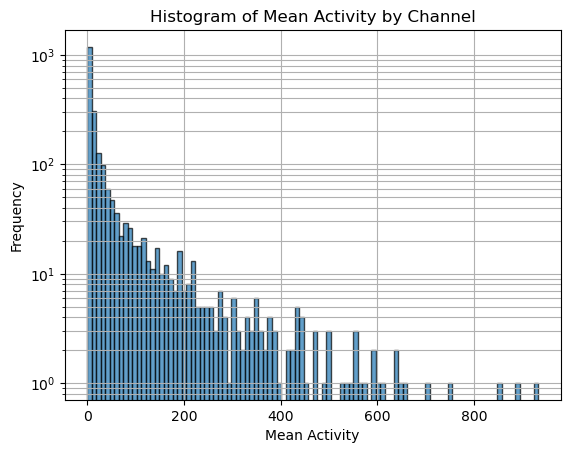

In [7]:
mean_activities = grouped_df['mean_activity'].to_list()

# Plot histogram of the mean activity values
plt.hist(mean_activities, bins=100, edgecolor="black", alpha=0.7)
plt.xlabel('Mean Activity')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Activity by Channel')
# plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both")
plt.show()

Not real cluster. So we choose reasonable activity as threshold (verifies manually) as 4 videos per day.

#### filter channels by activity

In [8]:
# merge with channels dataframe
filtered_df_ch = filtered_df_ch.join(grouped_df, on="channel", how="inner")

filtered_df_ch = filters.filter_df(filtered_df_ch, "mean_activity", 56, ">")

# filtered_df_ch.sort(by="mean_activity", descending=True).head(10)

print("Number of channels in category 'News & Politics' with more than 4 videos per",\
      f"day: {len(filtered_df_ch)}")

Number of channels in category 'News & Politics' with more than 4 videos per day: 407


### filter yt_metadata by channels obtained before

#### Transform feather into csv

In [4]:
df_vd_f = pd.read_feather(path_yt_metadata_feather)
# save to csv
df_vd_f.to_csv(path_yt_metadata_feather+".csv", sep="\t", index=False)

#### filter yt_metadata feather csv

In [12]:
filters.df_filter_csv_batched(path_yt_metadata_feather+".csv", path_yt_metadata_feather_filtered,
                              column_name="channel_id", values=filtered_df_ch["channel"],
                              filter_method="is_in")

#### Test if filtering worked

In [ ]:
filtered_df_metadata_feather = pl.read_csv(path_yt_metadata_feather_filtered)
# filtered_df_metadata_feather.sample(5)
print("Number of videos from channels of interest (CoI): "\
      f"{len(filtered_df_metadata_feather)}")

Number of videos from channels of interest (CoI): 6812344


#### filter yt_metadata.jsonl with channels obtained earlier

##### transform yt_metadata-en.jsonl into csv

In [9]:
filters.df_filter_jsonl_batched(path_yt_metadata, path_yt_metadata_filtered, 
                                column_name="channel_id", 
                                values=filtered_df_ch["channel"],
                                sep="\t", batch_size=500)

Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []


# Get country of channel

In [11]:
import importlib
from src.utils import general_utils
importlib.reload(general_utils)

<module 'src.utils.general_utils' from 'c:\\EPFL\\Fall_2024\\ADA\\Project\\src\\utils\\general_utils.py'>

In [12]:
high_activity_channels = filtered_df_ch.with_columns(
    pl.col("channel").map_elements(lambda channel_id:general_utils.get_channel_country(channel_id)).alias("Channel_country")
)

C:\Users\jeffr\AppData\Local\Temp\ipykernel_27572\2611294059.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  high_activity_channels = filtered_df_ch.with_columns(


## Example of filtered channel dataframe with country

In [ ]:
high_activity_channels.write_csv("data/high_activity_channels_with_country")
print(high_activity_channels.sample(10))

shape: (10, 10)
┌────────────┬───────────┬───────────┬───────────┬───┬───────────┬─────────┬───────────┬───────────┐
│ category_c ┆ join_date ┆ channel   ┆ name_cc   ┆ … ┆ subscribe ┆ weights ┆ mean_acti ┆ Channel_c │
│ c          ┆ ---       ┆ ---       ┆ ---       ┆   ┆ r_rank_sb ┆ ---     ┆ vity      ┆ ountry    │
│ ---        ┆ str       ┆ str       ┆ str       ┆   ┆ ---       ┆ f64     ┆ ---       ┆ ---       │
│ str        ┆           ┆           ┆           ┆   ┆ f64       ┆         ┆ f64       ┆ str       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═════════╪═══════════╪═══════════╡
│ News &     ┆ 2012-12-2 ┆ UCsNdeLwE ┆ News      ┆ … ┆ 7347.0    ┆ 2.5415  ┆ 156.30322 ┆ IN        │
│ Politics   ┆ 7         ┆ Zf86swPD3 ┆ Nation    ┆   ┆           ┆         ┆ 6         ┆           │
│            ┆           ┆ qJJ7Dw    ┆           ┆   ┆           ┆         ┆           ┆           │
│ News &     ┆ 2016-12-1 ┆ UCa8MaD6g ┆ Vesti     ┆ … ┆ 162669.0  ┆ 5.45    

# Filtering out english speaking channels with CHATGPT LLM API

Task:Use filtered_yt_metadata.csv and high_activity_channels_with_country.csv to filter for english videos

Since the youtube metadata dataset contains videos that are not from english speaking channels, awe need to do further processing. We use the CHATGPT API to analyze 5 videos and descriptions and if any video is not classified as english, the channel is marked as non-english

In [14]:
# Load the second dataset (with the list of channel IDs to compare against)
channels_df = pd.read_csv("data/high_activity_channels_with_country.csv") 
channel_ids = set(channels_df['channel'].unique())  
chunk_reader = pd.read_csv("data/filtered_yt_metadata.csv", chunksize=5000)

matching_videos = []
# Dictionary to track how many videos are saved for each channel
channel_video_count = {channel_id: 0 for channel_id in channel_ids}

for chunk in chunk_reader:
    # Filter rows where channel_id in chunk is in the set of channel_ids from channels_df
    matching_rows = chunk[chunk['channel_id'].isin(channel_ids)]
    for channel_id, group in matching_rows.groupby('channel_id'):
        # If we've already saved 5 videos for this channel, skip it
        if channel_video_count[channel_id] >= 5:
            continue
        # Get the first 5 videos for this channel (or fewer if there are less than 5)
        first_5_videos = group.head(5 - channel_video_count[channel_id])  # Adjust to avoid exceeding 5
        # Add the number of videos saved for this channel
        channel_video_count[channel_id] += len(first_5_videos)
        matching_videos.append(first_5_videos)

# Convert the list into DataFrame
final_df = pd.concat(matching_videos, ignore_index=True)
final_df.to_csv('data/matching_videos.csv', index=False)


### Parsing the video title and description with CHATGPT API

In [ ]:
## TESTING THE FUNCTION 
final_df = pd.read_csv("data/matching_videos.csv")
result = general_utils.check_channel_english(final_df, "UClMs26ViHFMy7MS897Alcxw")

channel is english


In [ ]:
# Iterate through pandas dataframe and check if channel is english
# Check each channel and store results
high_activity_channels = high_activity_channels.with_columns(
    pl.col("channel").map_elements(lambda channel_id:general_utils.check_channel_english(final_df, channel_id)).alias("Is_English")
)

In [ ]:
high_activity_channels.write_csv("data/high_activity_channels_country_and_english.csv")

### Printing value counts for which country channels that speak english and do not speak english are

In [16]:
filtered = pd.read_csv("data/high_activity_channels_country_and_english.csv")

In [17]:
english = filtered[filtered["Is_English"] == True]
print("English channels")
print(english["Channel_country"].value_counts())

not_english = filtered[filtered["Is_English"] == False]
print("Not channels")
print(not_english["Channel_country"].value_counts())

English channels
Channel_country
US                   149
IN                    49
PK                    13
Channel not found      9
CA                     8
GB                     7
NG                     6
ZA                     4
KE                     4
PH                     3
CN                     3
FR                     2
GH                     2
IL                     2
MY                     2
QA                     1
UK                     1
CH                     1
UG                     1
BZ                     1
TR                     1
DE                     1
EC                     1
BD                     1
GU                     1
PG                     1
AU                     1
LK                     1
SG                     1
TH                     1
Name: count, dtype: int64
Not channels
Channel_country
IN                   81
PK                   11
US                   10
Channel not found     6
PH                    5
NP                    4
BD                

## Save all the final dataframes

In [ ]:
df_final_channels = pl.read_csv("data/high_activity_channels_country_and_english.csv", separator=",")
df_final_channels = df_final_channels.filter((pl.col("Channel_country") == "US") & (pl.col("Is_English") == True))
df_final_channels = df_final_channels.rename({"Is_English": "is_english", "Channel_country": "channel_country"})

df_final_channels.write_csv(path_final_channels, include_header=True, separator=",")

In [ ]:
# metadata feather
filters.df_filter_csv_batched(path_yt_metadata_feather_filtered, path_final_yt_metadata_feather,
                              column_name="channel_id", values=df_final_channels["channel"],
                              filter_method="is_in", sep_in="\t", sep_out=",")

In [ ]:
# metadata
df_final_yt_metadata = pl.read_csv(path_yt_metadata_filtered, has_header=True, 
                                   separator="\t", infer_schema=False)
df_final_yt_metadata = filters.filter_df_isin(df_final_yt_metadata, "channel_id", df_final_channels["channel"])
df_final_yt_metadata.write_csv(path_final_yt_metadata, include_header=True, separator=",")


In [ ]:
# timeseries
df_final_timeseries = pl.read_csv(path_df_timeseries, separator="\t", has_header=True)
df_final_timeseries = filters.filter_df_isin(df_final_timeseries, column_name="channel", 
                                                values=df_final_channels["channel"])
df_final_timeseries.write_csv(path_final_timeseries, include_header=True, separator=",")


Summary of Filtering:

In [ ]:
print("Final Number of videos from channels of interest (CoI): "\
      f"{len(df_final_yt_metadata)}")

print("Final channels of interest (CoI): "\
      f"{len(df_final_channels)}")

Final Number of videos from channels of interest (CoI): 2548064
Final channels of interest (CoI): 149


## Filtering relevant comments

We want to filter out the comments related the videos in the df_final_yt_metadata. To do this, we initially tried using our personal PCs to filter out the youtube_comments.tsv.gz dataset, but found that it would take multiple months. To address this lack of resources, we use AWS resources for more powerful computations. The code below is running on Amazon Sagemaker and the dataset is stored in a S3 bucket.

In [ ]:
import boto3
import polars as pl
import pandas as pd
import s3fs
from urllib.parse import urlparse

In [ ]:
# Define the S3 bucket name and any prefix you want to use
bucket_name = 'adaproject-lil0mohammedali'

# Initialize a session using Boto3
s3 = boto3.resource('s3')
bucket = s3.Bucket(bucket_name)

for obj in bucket.objects.filter():
    print(obj.key)


In [ ]:
fs = s3fs.S3FileSystem()

s3_metadata_path = "s3://adaproject-lil0mohammedali/final_yt_metadata_helper.csv"
s3_comments_path = "s3://adaproject-lil0mohammedali/youtube_comments.tsv.gz"
s3_output_path = "s3://adaproject-lil0mohammedali/filtered_youtube_comments.tsv"

batch_size = int(8600000000 / 100000)  
total_batches = 8600000000 / batch_size  

filtered_df_metadata_feather = pl.read_csv(s3_metadata_path)

with fs.open(s3_output_path, "wb") as output_file:
    # Open the input comments file on S3
    with fs.open(s3_comments_path, "rb") as f:
        for i, chunk in enumerate(
            pl.read_csv(f, sep='\t', compression='gzip', batch_size=batch_size,
            )
        ):
            filtered_batch = chunk.filter(
                pl.col("video_id").is_in(filtered_df_metadata_feather["display_id"])
            )
            
            # For the first batch, include the header; otherwise, append without header
            if i == 0:
                include_header = 1 
            else:
                include_header = 0
            filtered_batch.write_csv(output_file, include_header=include_header)
            
            print(f"Processed batch {i + 1} / {int(total_batches)} \r", end="")

## FILTER COMMENTS UPDATED

In [ ]:
# # load yt metadata in chunks and filter for videos contained in filtered_df_ch
# # df.filter(pl.col("categories") == "News & Politics") to filter for categories of videos instead
import polars as pl
import pandas as pd
import time 
import os

# iterate through the comment files 
tsv_gz_files = []
directory = 'comments_line_separated'
for root, _, files in os.walk(directory):
    for file in files:
        if file.endswith(".gz"):
            tsv_gz_files.append(os.path.join(root, file))
            
print(tsv_gz_files)
video_metadata_df = pl.read_csv("data/final_yt_metadata_helper.csv")
# Define the chunk size (number of rows per chunk)
chunk_size = 100000
NUM_ROWS = 400000000
total_chunks = NUM_ROWS / chunk_size
# print(video_metadata_df.shape)

for i in range(len(tsv_gz_files)):
    file_path = tsv_gz_files[i]
    print("Currently processing: ", file_path)
    
    start_time = time.time()

    # create an iterator for processing the file in chunks, set header=None if part is not "aa"
    chunk_iterator = pd.read_csv(file_path, 
                                sep='\t',  
                                compression='gzip',  
                                chunksize=chunk_size,
                                header=None, 
                                iterator=True)

    out_file = os.path.basename(tsv_gz_files[i])
    out_file = out_file[:-3]
    out_file = out_file + "_filtered.csv"
    print(out_file)
    
    for chunk_number, chunk in enumerate(chunk_iterator):
        pl_chunk = pl.from_pandas(chunk)
        
        filtered_chunk = pl_chunk.filter(pl.col("1").is_in(video_metadata_df["display_id"]))
        if chunk_number == 0:
            filtered_chunk.write_csv(out_file, include_header=True)
        else:
            with open(out_file, mode="a") as f:
                filtered_chunk.write_csv(f, include_header=False)
        if chunk_number % 20 == 0:
            print(f"{chunk_number} / {total_chunks} processed" )
            
            
    # print time to process files
    end_time = time.time()
    elapsed_seconds = end_time - start_time

    hours, remainder = divmod(elapsed_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)

    print(f"Total processing time for file {os.path.basename(file_path)}: {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds")

Combining the smaller csv files into one filtered csv

In [ ]:
import os
import polars as pl

def combine_csv_files_polars(input_directory, output_file):
    combined_data = []

    for root, _, files in os.walk(input_directory):
        for file in files:
            if file.endswith(".csv"): 
                file_path = os.path.join(root, file)
                print(f"Reading: {file_path}")
                df = pl.read_csv(file_path)
                combined_data.append(df)

    combined_df = pl.concat(combined_data)
        
    combined_df.write_csv(output_file)
    print(f"Combined CSV saved to: {output_file}")

input_directory = "filtered_comments"  
output_file = "news_videos_filtered_comments.csv"  

combine_csv_files_polars(input_directory, output_file)

In [ ]:
import polars as pl

df = pl.read_csv('news_videos_filtered_comments.csv', n_rows=100)
print(df)

shape: (100, 4)
┌───────────┬─────────────┬───────┬─────────┐
│ author    ┆ video_id    ┆ likes ┆ replies │
│ ---       ┆ ---         ┆ ---   ┆ ---     │
│ i64       ┆ str         ┆ i64   ┆ i64     │
╞═══════════╪═════════════╪═══════╪═════════╡
│ 187550223 ┆ ll61nxDqImc ┆ 0     ┆ 1       │
│ 187550231 ┆ KMxWRrnQlTs ┆ 0     ┆ 0       │
│ 187550303 ┆ GsQY5hcsQcY ┆ 0     ┆ 0       │
│ 187550303 ┆ 32aO7vmHHKM ┆ 4     ┆ 0       │
│ 187550303 ┆ jQESa88NIjU ┆ 0     ┆ 1       │
│ …         ┆ …           ┆ …     ┆ …       │
│ 187550571 ┆ 17Xl75GwOaM ┆ 0     ┆ 0       │
│ 187550571 ┆ ySPSZ-s2fzM ┆ 0     ┆ 0       │
│ 187550571 ┆ EF89VB-nUyM ┆ 3     ┆ 2       │
│ 187550571 ┆ L_S3KauQWqk ┆ 0     ┆ 0       │
│ 187550571 ┆ G8hnDuPlLI4 ┆ 0     ┆ 1       │
└───────────┴─────────────┴───────┴─────────┘


In [ ]:
import shutil

# updating the header of the filtered comments file

from_file = open("news_videos_filtered_comments.csv", 'r')
to_file = open("updated_news_videos_filtered_comments.csv", 'w')

replacement_line = 'author,video_id,likes,replies\n'
from_file.readline() # and discard
to_file.write(replacement_line)
shutil.copyfileobj(from_file, to_file)   
    